In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc('font', family='AppleGothic') #한글 깨짐 방지 설정

In [44]:
train_df = pd.read_csv('./open/train.csv')
train_df.head()

ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0  TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1  TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2  TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3  TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4  TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   

   부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
0        18.90    15  부채 통합             0       0       0.0    0.0    0.0    C  
1        22.33    21  주택 개선             0  373572  234060.0    0.0    0.0    B  
2         8.60    14  부채 통합             0  928644  151944.0    0.0    0.0    A  
3        15.09    15  부채 통합             0  325824  153108.0    0.0    0.0    C  
4        25.39    19  주요 구매             0  228540  148956.0    0.0    0.0    B

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [46]:
train_df.describe(include='all')

ID          대출금액        대출기간       근로기간    주택소유상태  \
count         96294  9.629400e+04       96294      96294     96294   
unique        96294           NaN           2         16         4   
top     TRAIN_00000           NaN   36 months  10+ years  MORTGAGE   
freq              1           NaN       64479      31585     47934   
mean            NaN  1.830400e+07         NaN        NaN       NaN   
std             NaN  1.032908e+07         NaN        NaN       NaN   
min             NaN  1.200000e+06         NaN        NaN       NaN   
25%             NaN  1.020000e+07         NaN        NaN       NaN   
50%             NaN  1.680000e+07         NaN        NaN       NaN   
75%             NaN  2.400000e+07         NaN        NaN       NaN   
max             NaN  4.200000e+07         NaN        NaN       NaN   

                연간소득   부채_대비_소득_비율          총계좌수   대출목적  최근_2년간_연체_횟수  \
count   9.629400e+04  96294.000000  96294.000000  96294  96294.000000   
unique           NaN           NaN           NaN     12           NaN   
top              NaN           NaN           NaN  부채 통합           NaN   
freq             NaN           NaN           NaN  55150           NaN   
mean    9.392672e+07     19.379590     25.304827    NaN      0.345681   
std     9.956871e+07     33.569559     12.088566    NaN      0.919119   
min     0.000000e+00      0.000000      4.000000    NaN      0.000000   
25%     5.760000e+07     12.650000     17.000000    NaN      0.000000   
50%     7.800000e+07     18.740000     24.000000    NaN      0.000000   
75%     1.128000e+08     25.540000     32.000000    NaN      0.000000   
max     1.080000e+10   9999.000000    169.000000    NaN     30.000000   

               총상환원금         총상환이자         총연체금액         연체계좌수   대출등급  
count   9.629400e+04  9.629400e+04  96294.000000  96294.000000  96294  
unique           NaN           NaN           NaN           NaN      7  
top              NaN           NaN           NaN           NaN      B  
freq             NaN           NaN           NaN           NaN  28817  
mean    8.225035e+05  4.282282e+05     54.380584      0.005805    NaN  
std     1.027745e+06  4.402111e+05   1414.769218      0.079966    NaN  
min     0.000000e+00  0.000000e+00      0.000000      0.000000    NaN  
25%     3.075720e+05  1.346160e+05      0.000000      0.000000    NaN  
50%     5.976960e+05  2.870040e+05      0.000000      0.000000    NaN  
75%     1.055076e+06  5.702160e+05      0.000000      0.000000    NaN  
max     4.195594e+07  5.653416e+06  75768.000000      4.000000    NaN

In [47]:
# train set에 있는 주택소유상태 = 'ANY'인 것 삭제, test set에는 없는 항목이고 train set에도 1개 밖에 되지 않아 삭제하는 것이 좋다고 판단.

train_df = train_df[train_df['주택소유상태']!= 'ANY']

In [48]:
# 근로기간 컬럼 중복된 항목 합치기
# 함수 선언

def unit_standardization(x):
    if (x == '10+ years') or (x == '10+years'):
        return '10년이상'
    elif x == '9 years':
        return '9'
    elif x == '8 years':
        return '8'
    elif x == '7 years':
        return '7'
    elif x == '6 years':
        return '6'
    elif x == '5 years':
        return '5'
    elif x == '4 years':
        return '4'
    elif (x == '3 years') or (x == '3'):
        return '3'
    elif x == '2 years':
        return '2'
    elif (x == '1 year') or (x == '1 years'):
        return '1'
    elif (x == '< 1 year') or (x == '<1 year') :
        return '1년이하'
    else:
        return 'Unknown'

In [49]:
# train set에 적용

train_df['근로기간'] = train_df['근로기간'].apply(unit_standardization)

In [50]:
# 대출기간 범주형 --> 수치형으로 변경
# 함수 선언

def conv_loan_period(x):
    if x == ' 36 months':
        return 36
    else:
        return 60

In [51]:
# train set에 적용

train_df['대출기간'] = train_df['대출기간'].apply(conv_loan_period)

In [52]:
display(train_df.head(3))

ID      대출금액  대출기간   근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
0  TRAIN_00000  12480000    36      6      RENT   72000000        18.90    15   
1  TRAIN_00001  14400000    60  10년이상  MORTGAGE  130800000        22.33    21   
2  TRAIN_00002  12000000    36      5  MORTGAGE   96000000         8.60    14   

    대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
0  부채 통합             0       0       0.0    0.0    0.0    C  
1  주택 개선             0  373572  234060.0    0.0    0.0    B  
2  부채 통합             0  928644  151944.0    0.0    0.0    A

In [53]:
# 파생변수 생성하기

train_df['총상환액'] = train_df['총상환원금'] + train_df['총상환이자']

In [54]:
train_df['총상환대출비율'] = train_df['총상환액'] / train_df['대출금액']
train_df['월별대출금액'] = train_df['대출금액'] / train_df['대출기간']

In [55]:
train_df.head(3)

ID      대출금액  대출기간   근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
0  TRAIN_00000  12480000    36      6      RENT   72000000        18.90    15   
1  TRAIN_00001  14400000    60  10년이상  MORTGAGE  130800000        22.33    21   
2  TRAIN_00002  12000000    36      5  MORTGAGE   96000000         8.60    14   

    대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급       총상환액  \
0  부채 통합             0       0       0.0    0.0    0.0    C        0.0   
1  주택 개선             0  373572  234060.0    0.0    0.0    B   607632.0   
2  부채 통합             0  928644  151944.0    0.0    0.0    A  1080588.0   

    총상환대출비율         월별대출금액  
0  0.000000  346666.666667  
1  0.042197  240000.000000  
2  0.090049  333333.333333

In [60]:
# 수치형 컬럼 분포 시각화 함수

def get_3_hist(data:pd.DataFrame, columns:list):

    plt.figure(figsize=(15, 5 * (len(columns) // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(len(columns) // 3 + (len(columns) % 3 > 0), 3, i + 1)
        # 히스토그램 그리기
        sns.histplot(data[col], kde=True)
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()

In [61]:
train_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급',
       '총상환액', '총상환대출비율', '월별대출금액'],
      dtype='object')

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96293 entries, 0 to 96293
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96293 non-null  object 
 1   대출금액          96293 non-null  int64  
 2   대출기간          96293 non-null  int64  
 3   근로기간          96293 non-null  object 
 4   주택소유상태        96293 non-null  object 
 5   연간소득          96293 non-null  int64  
 6   부채_대비_소득_비율   96293 non-null  float64
 7   총계좌수          96293 non-null  int64  
 8   대출목적          96293 non-null  object 
 9   최근_2년간_연체_횟수  96293 non-null  int64  
 10  총상환원금         96293 non-null  int64  
 11  총상환이자         96293 non-null  float64
 12  총연체금액         96293 non-null  float64
 13  연체계좌수         96293 non-null  float64
 14  대출등급          96293 non-null  object 
 15  총상환액          96293 non-null  float64
 16  총상환대출비율       96293 non-null  float64
 17  월별대출금액        96293 non-null  float64
dtypes: float64(7), int64(6), o

In [63]:
numeric_list = ['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수',
       '총상환액', '총상환대출비율', '월별대출금액']

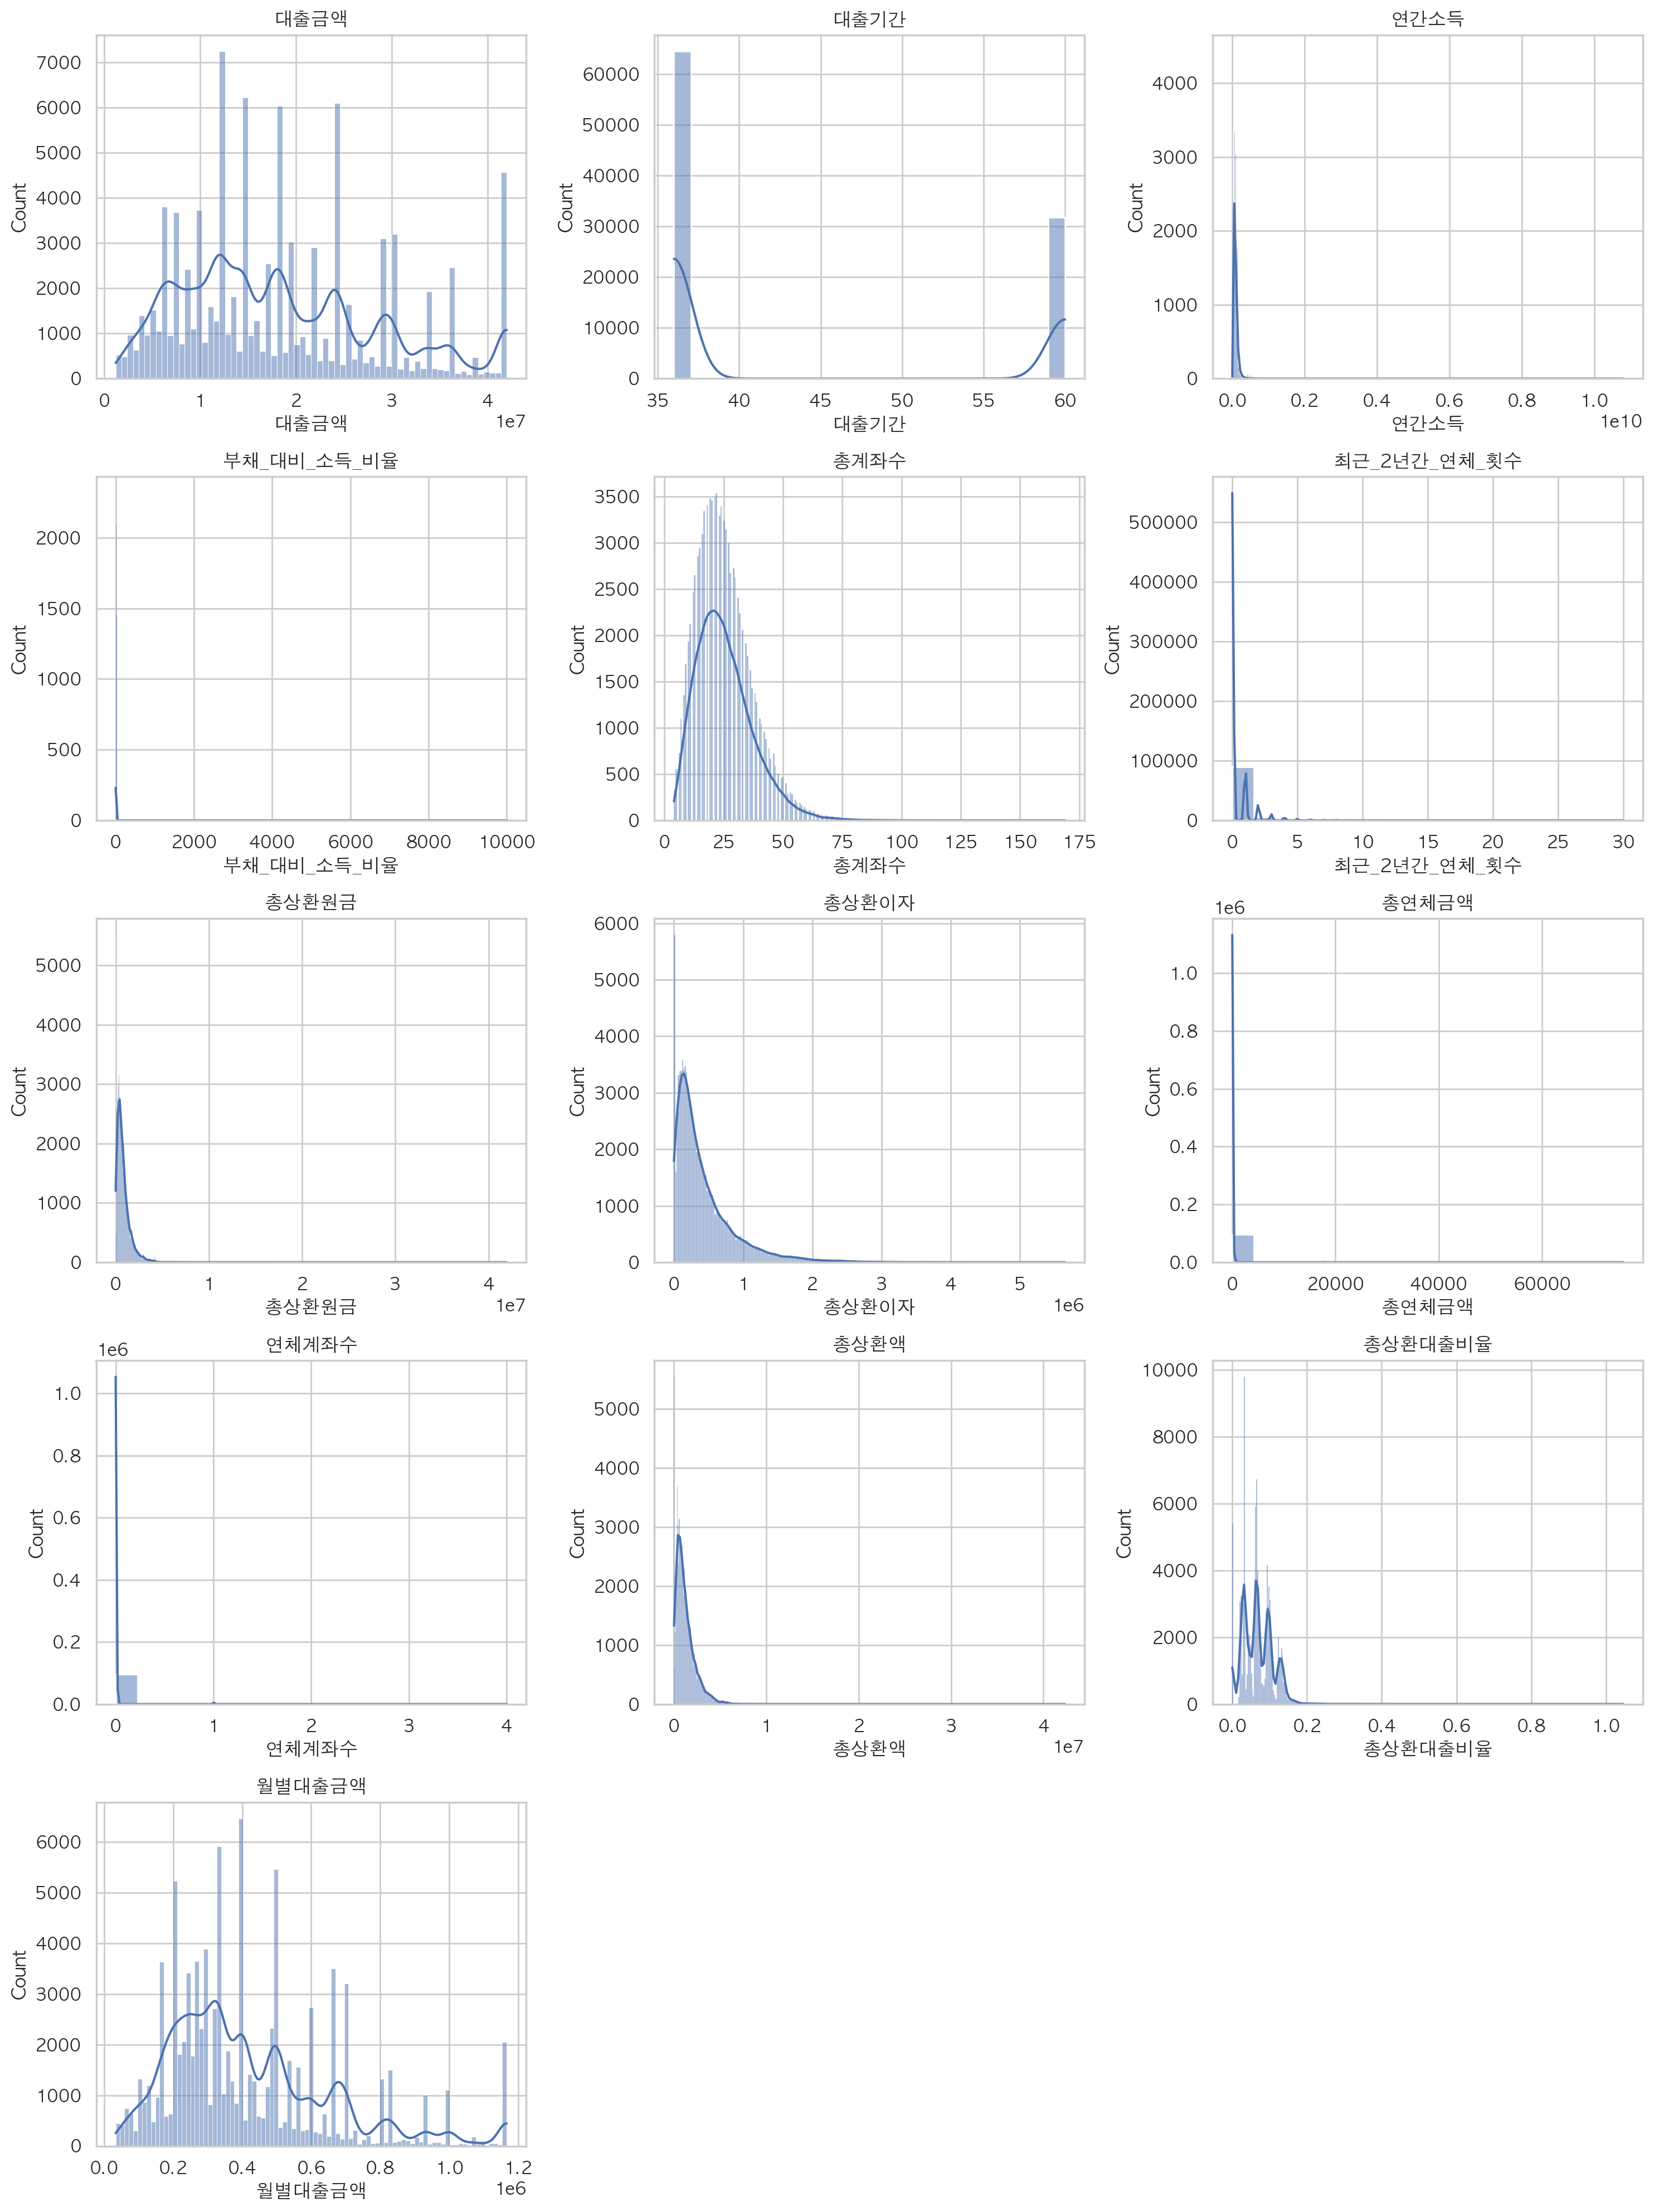

In [64]:
get_3_hist(train_df, numeric_list)

In [65]:
#수치형 데이터 로그 스케일링 적용

numeric_columns = train_df.select_dtypes(include=[np.number]).columns

train_df[numeric_columns] = np.log1p(train_df[numeric_columns])

In [66]:
numeric_columns

Index(['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금',
       '총상환이자', '총연체금액', '연체계좌수', '총상환액', '총상환대출비율', '월별대출금액'],
      dtype='object')

In [67]:
train_df.head(3)

ID       대출금액      대출기간   근로기간    주택소유상태       연간소득  부채_대비_소득_비율  \
0  TRAIN_00000  16.339638  3.610918      6      RENT  18.092177     2.990720   
1  TRAIN_00001  16.482739  4.110874  10년이상  MORTGAGE  18.689180     3.149740   
2  TRAIN_00002  16.300417  3.610918      5  MORTGAGE  18.379859     2.261763   

       총계좌수   대출목적  최근_2년간_연체_횟수      총상환원금      총상환이자  총연체금액  연체계좌수 대출등급  \
0  2.772589  부채 통합           0.0   0.000000   0.000000    0.0    0.0    C   
1  3.091042  주택 개선           0.0  12.830869  12.363337    0.0    0.0    B   
2  2.708050  부채 통합           0.0  13.741482  11.931274    0.0    0.0    A   

        총상환액   총상환대출비율     월별대출금액  
0   0.000000  0.000000  12.756122  
1  13.317326  0.041331  12.388398  
2  13.893017  0.086223  12.716901

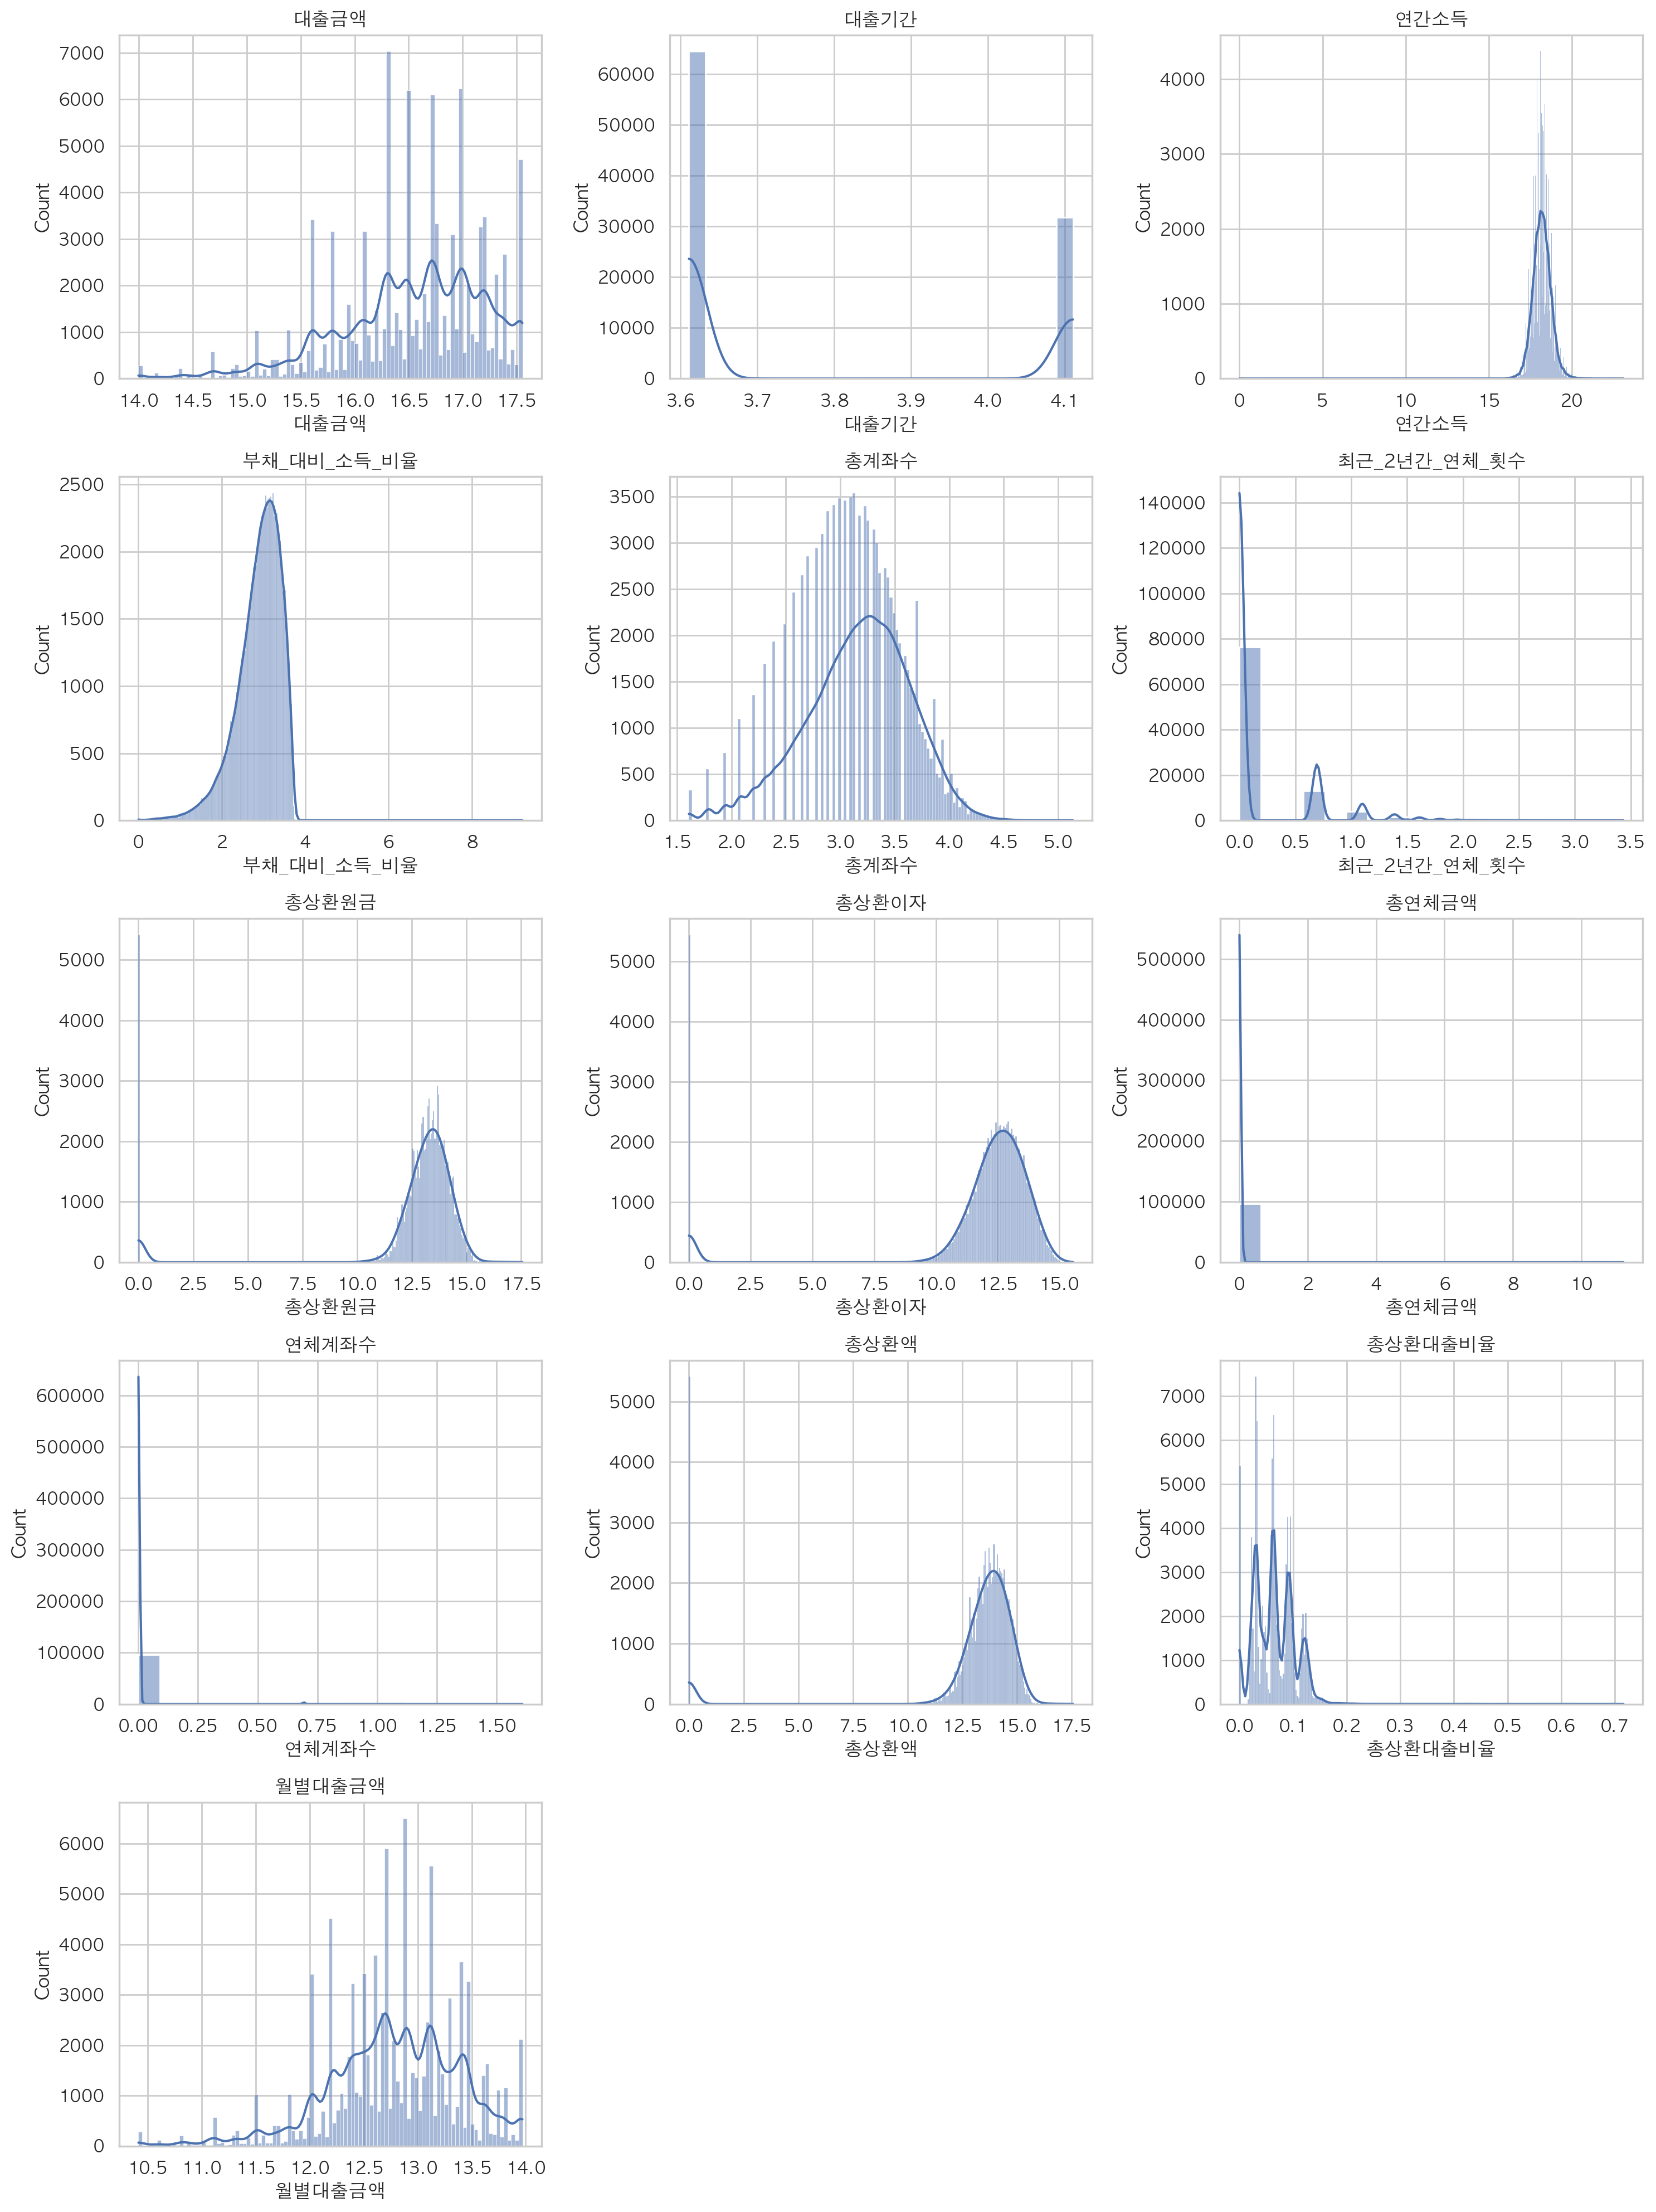

In [68]:
#로그스케일 변환 후 시각화
get_3_hist(train_df, numeric_columns)

In [69]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

In [70]:
# MinMaxScaler 객체 생성
mm_scaler = MinMaxScaler()

In [71]:
# 선택한 컬럼들에 대해 스케일링 적용
train_df[numeric_columns] = mm_scaler.fit_transform(train_df[numeric_columns])

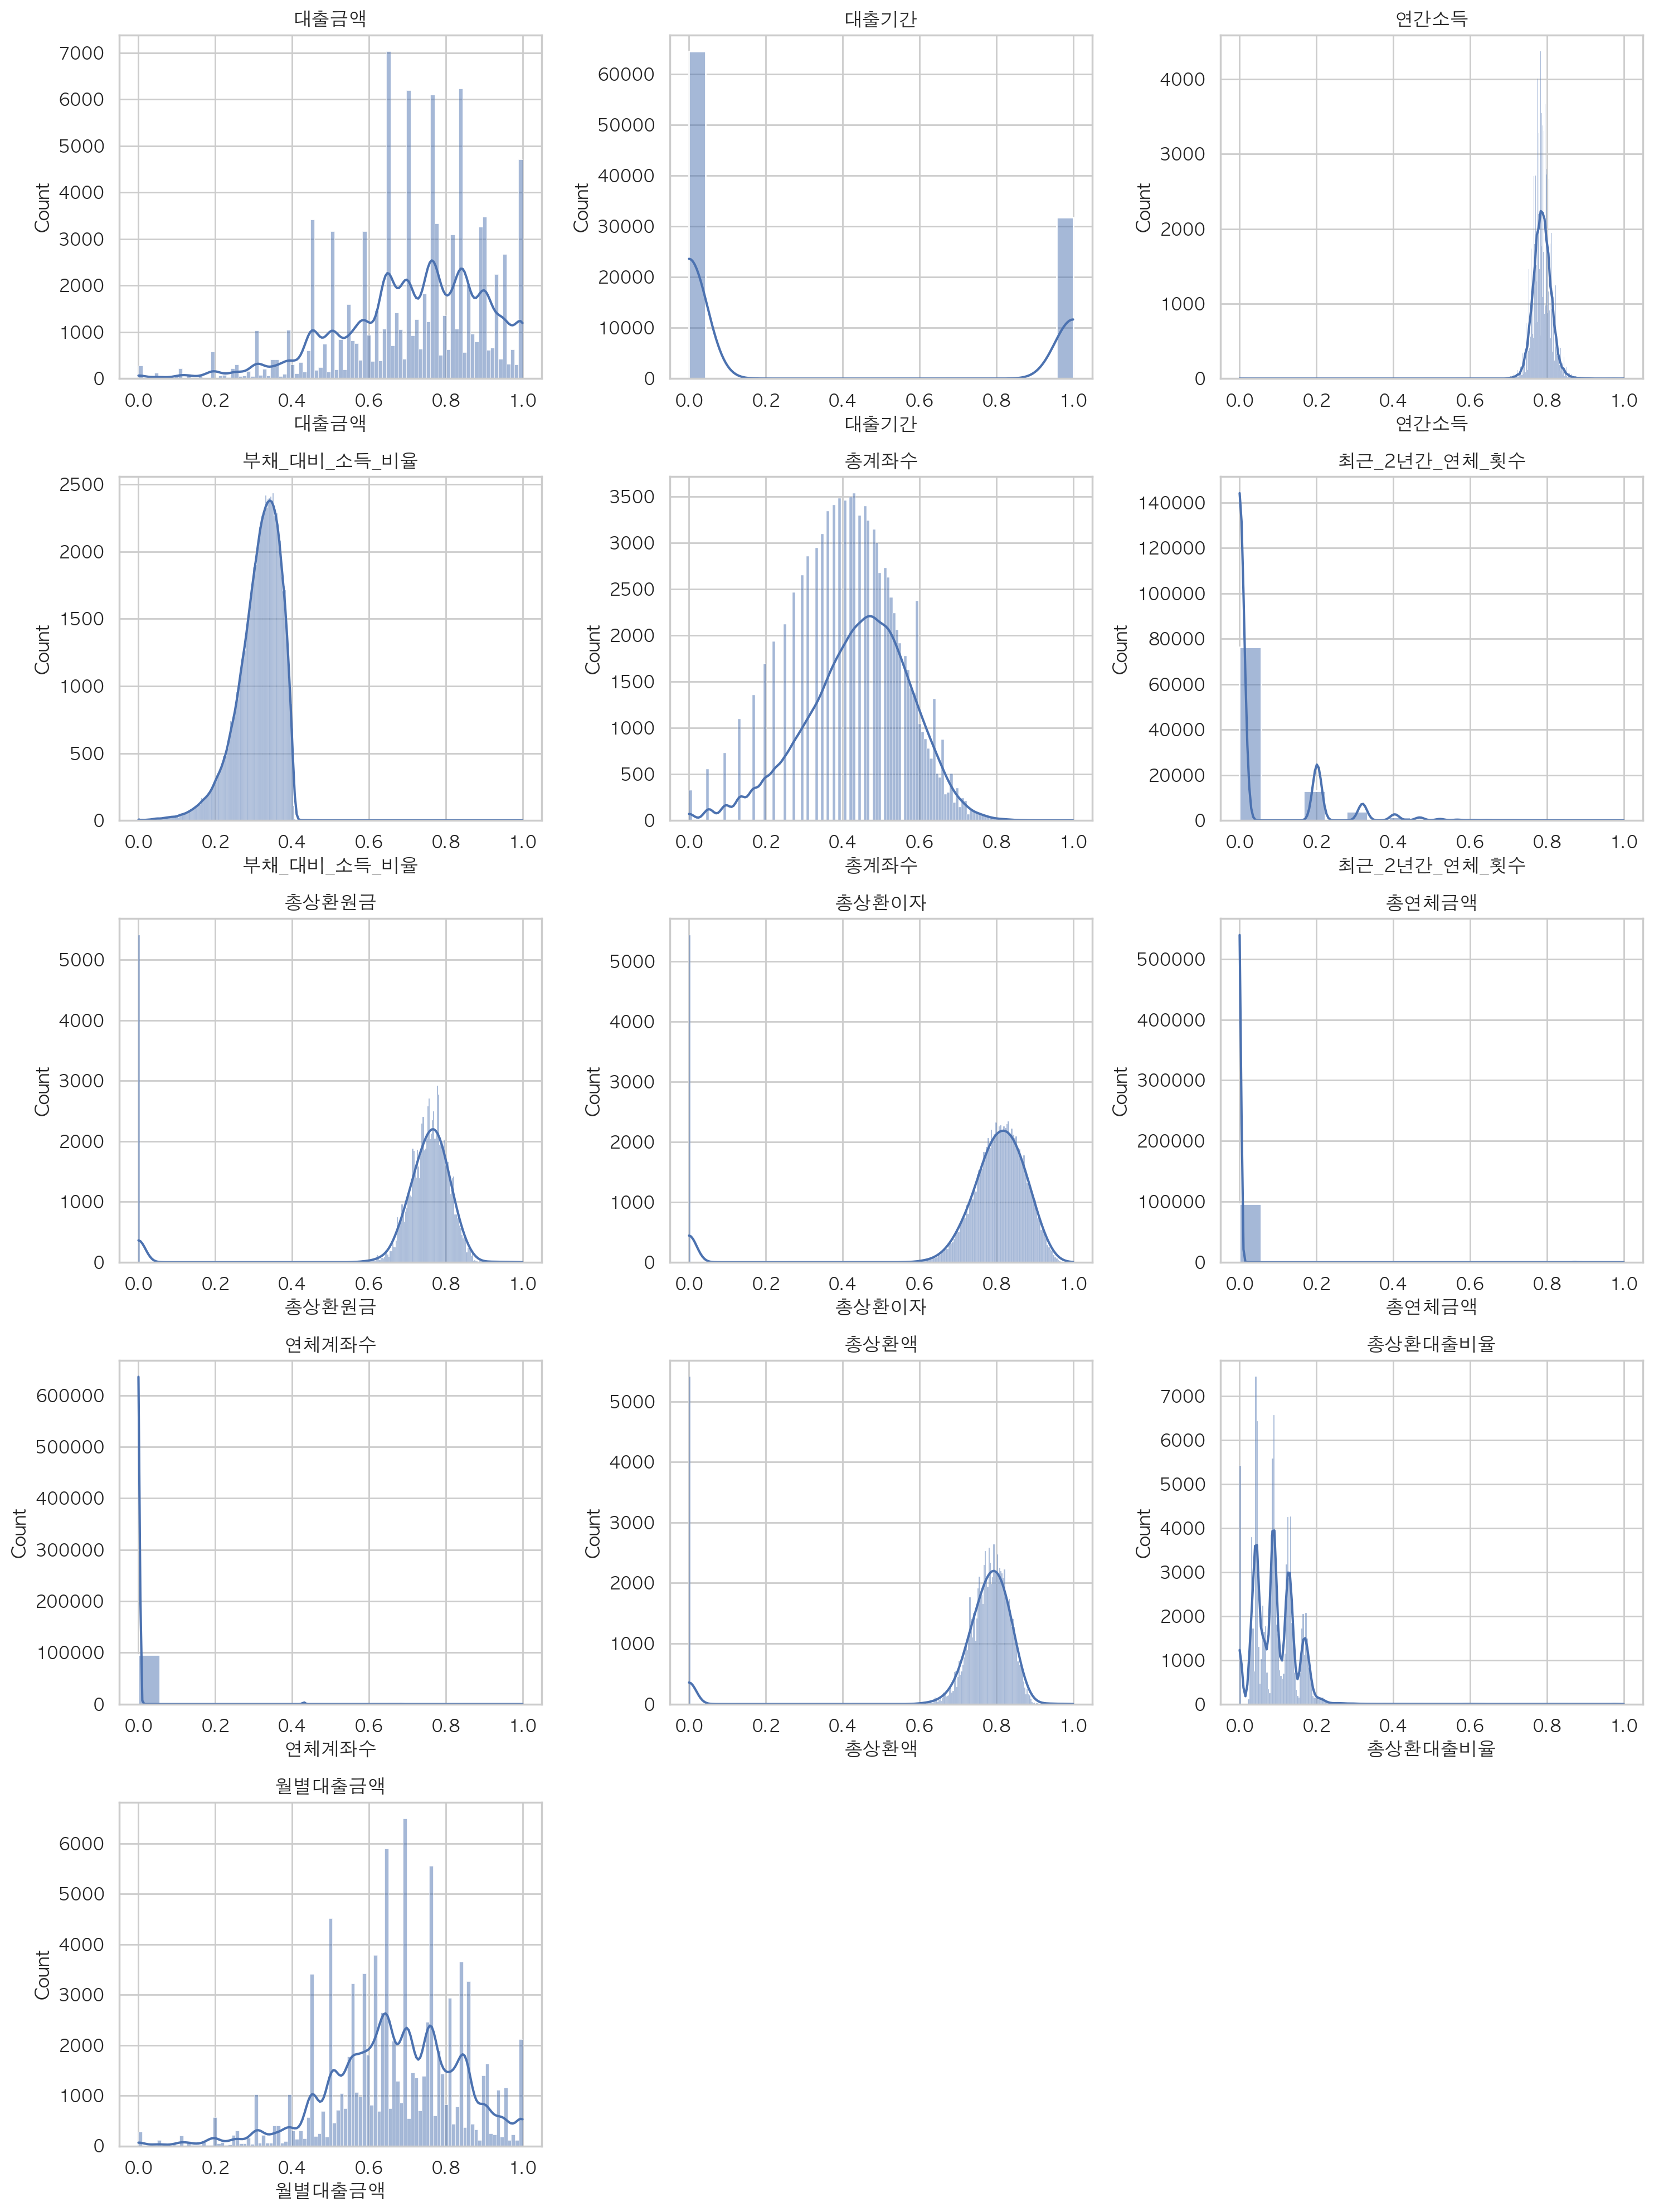

In [72]:
# MinMax 스케일 변환 후 시각화
get_3_hist(train_df, numeric_columns)

In [73]:
# 범주형데이터 인코딩

from sklearn.preprocessing import LabelEncoder

In [74]:
# LabelEncoder 인스턴스 생성
label_encoder = LabelEncoder()

In [75]:
encoding_list = ['근로기간', '주택소유상태', '대출목적', '대출등급']

In [76]:
# 각 컬럼에 대해 라벨 인코딩 수행
for column in encoding_list:
    train_df[column] = label_encoder.fit_transform(train_df[column])

In [77]:
train_df.head()

ID      대출금액  대출기간  근로기간  주택소유상태      연간소득  부채_대비_소득_비율      총계좌수  \
0  TRAIN_00000  0.658671   0.0     7       2  0.783116     0.324713  0.329845   
1  TRAIN_00001  0.698921   1.0     1       0  0.808957     0.341979  0.420151   
2  TRAIN_00002  0.647640   0.0     6       0  0.795568     0.245568  0.311543   
3  TRAIN_00003  0.698921   0.0     9       0  0.809352     0.301639  0.329845   
4  TRAIN_00004  0.761684   1.0    11       2  0.782957     0.355360  0.393123   

   대출목적  최근_2년간_연체_횟수     총상환원금     총상환이자  총연체금액  연체계좌수  대출등급      총상환액  \
0     1           0.0  0.000000  0.000000    0.0    0.0     2  0.000000   
1    10           0.0  0.731015  0.795184    0.0    0.0     1  0.758338   
2     1           0.0  0.782895  0.767395    0.0    0.0     0  0.791120   
3     1           0.0  0.723224  0.767885    0.0    0.0     2  0.744785   
4     8           0.0  0.703018  0.766117    0.0    0.0     1  0.731233   

    총상환대출비율    월별대출금액  
0  0.000000  0.658669  
1  0.057717  0.555240  
2  0.120407  0.647638  
3  0.045690  0.698919  
4  0.028984  0.618003

In [78]:
train_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급',
       '총상환액', '총상환대출비율', '월별대출금액'],
      dtype='object')

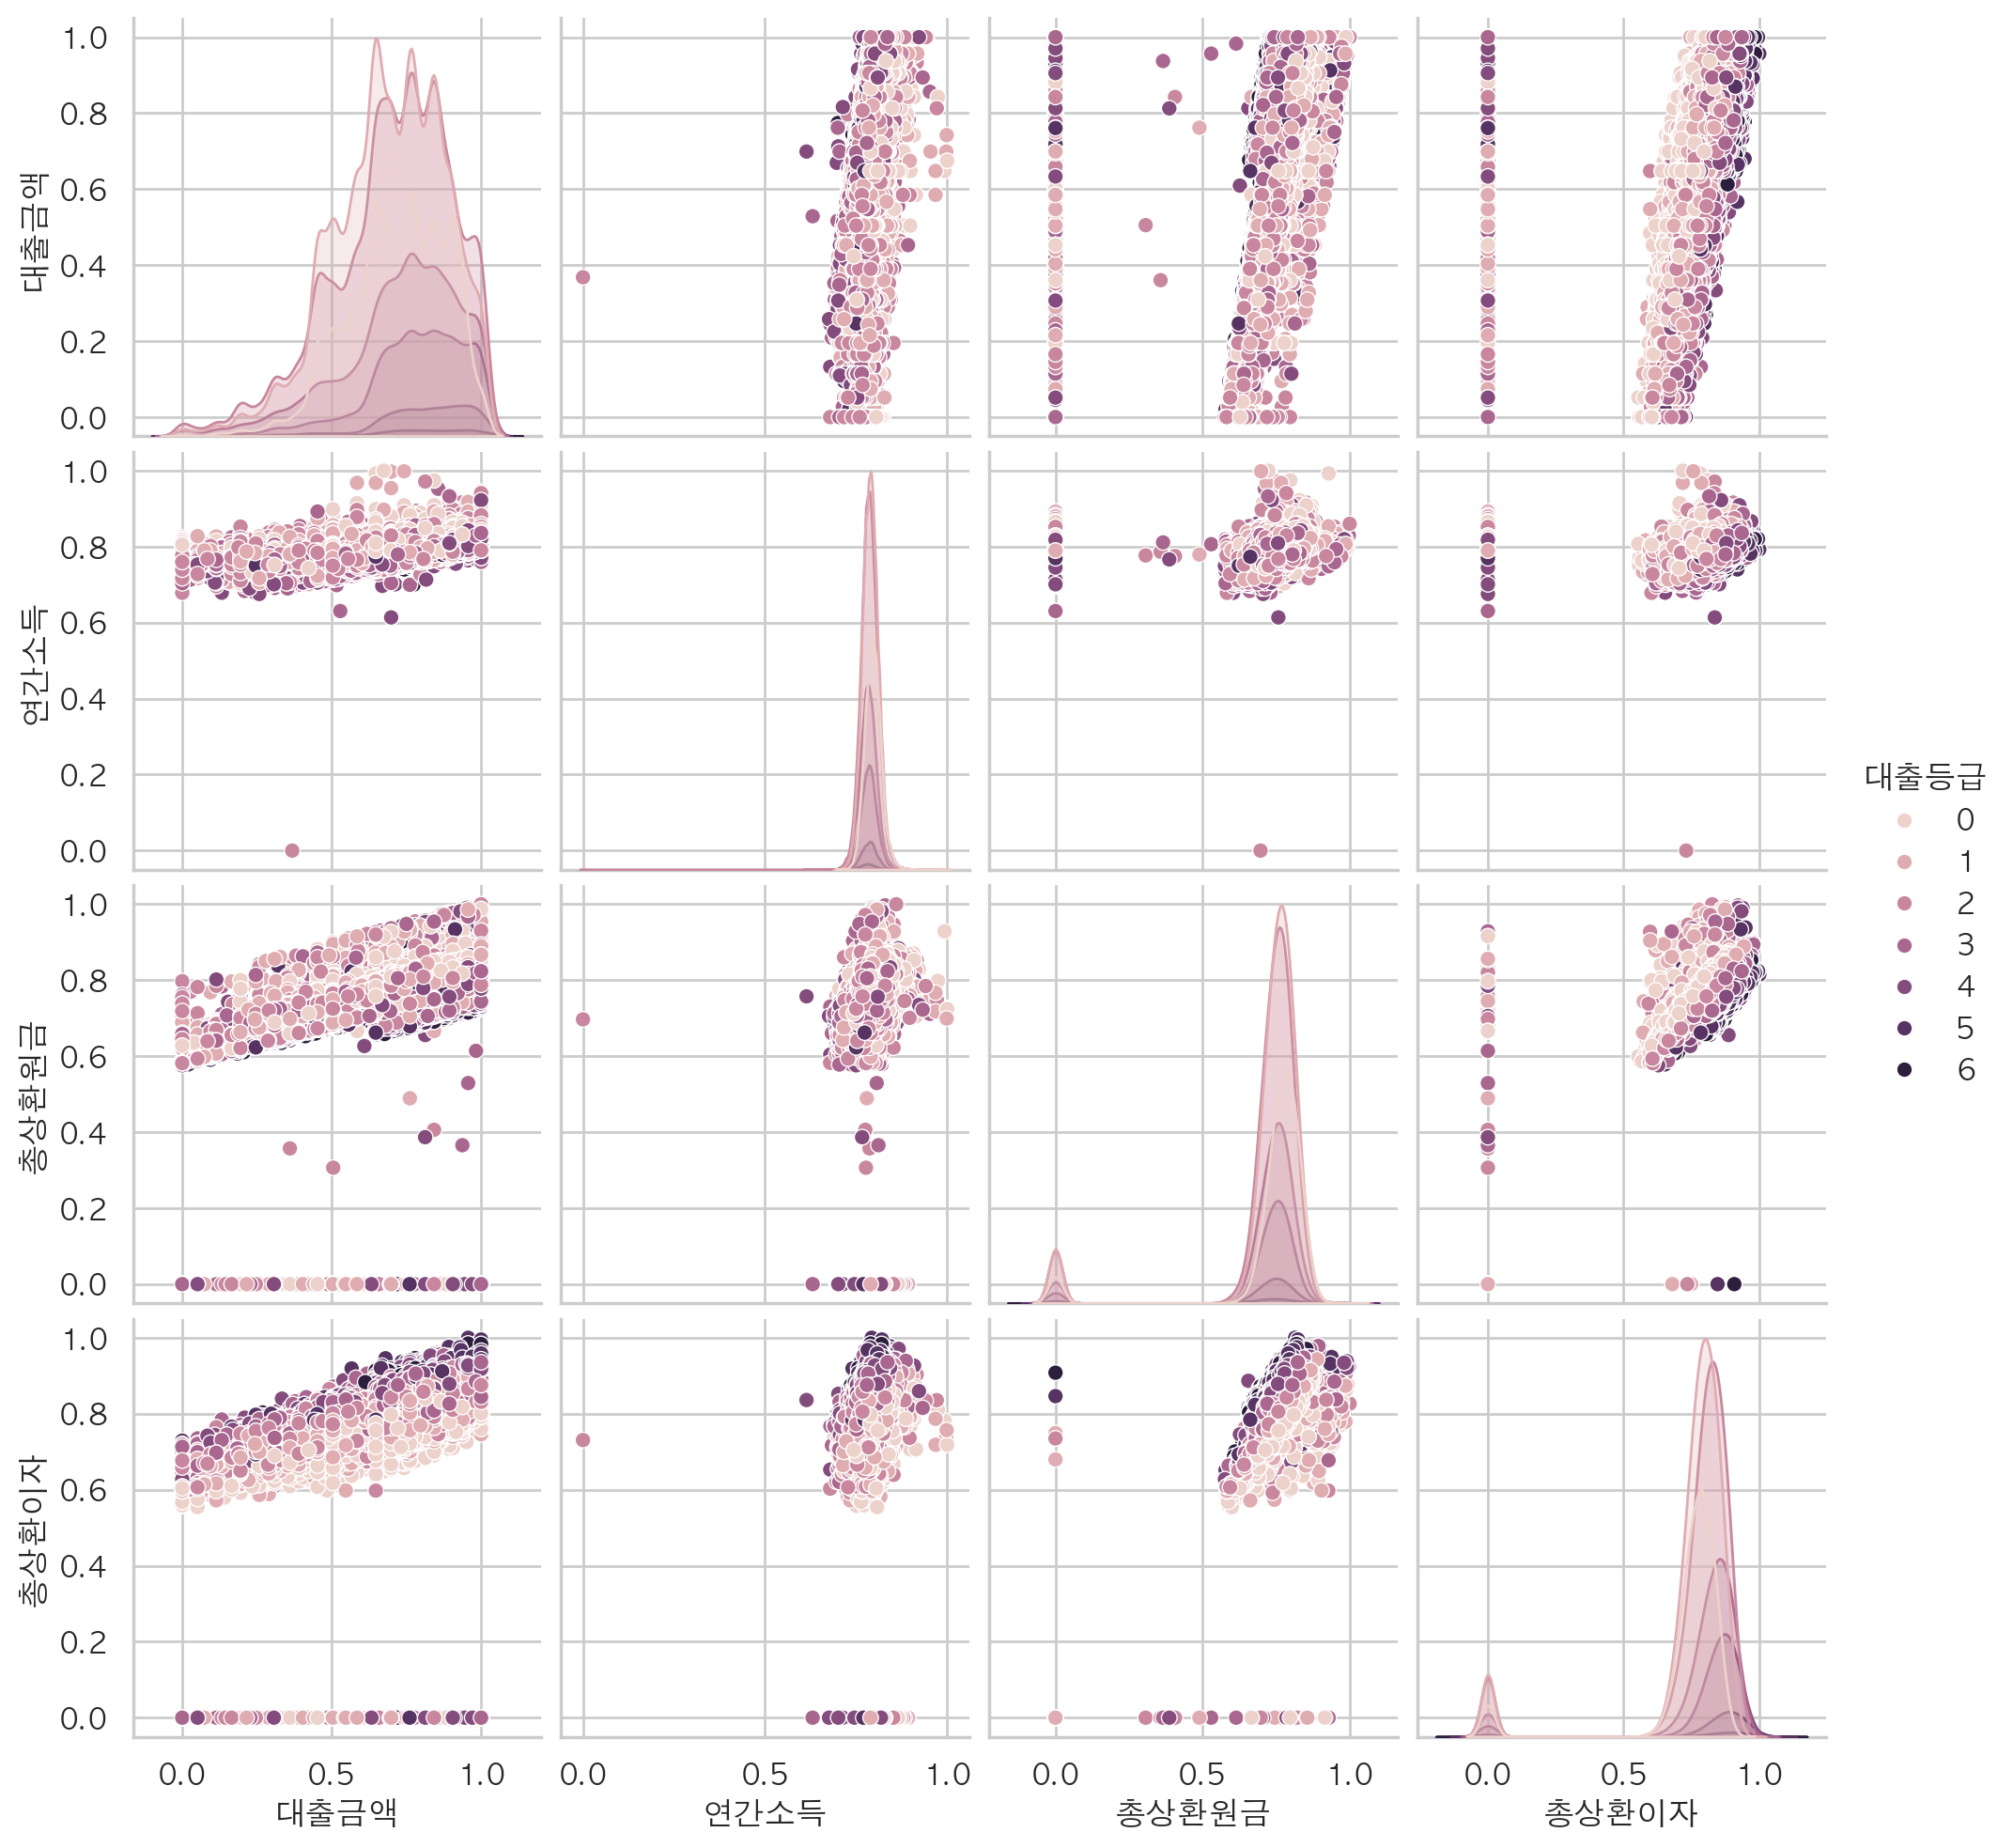

In [82]:
sns.pairplot(train_df, hue="대출등급", vars=['대출금액', '연간소득', '총상환원금', '총상환이자'])
plt.show()

In [83]:
# shap import

import shap

In [84]:
# train set을 train과 test로 나누기

from sklearn.model_selection import train_test_split

In [85]:
train_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급',
       '총상환액', '총상환대출비율', '월별대출금액'],
      dtype='object')

In [86]:
x_list = ['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수',
       '총상환액', '총상환대출비율', '월별대출금액']

In [87]:
X = train_df[x_list] 
y = train_df['대출등급']

# Train set과 Test set으로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72219, 16)
(24074, 16)
(72219,)
(24074,)


In [89]:
X_train.head(3)

대출금액  대출기간  근로기간  주택소유상태      연간소득  부채_대비_소득_비율      총계좌수  대출목적  \
67899  0.669286   0.0     1       2  0.753113     0.362408  0.508104     1   
1176   0.839417   0.0    10       2  0.768696     0.324385  0.329845     1   
24038  0.983450   0.0     1       0  0.805227     0.331071  0.444826     1   

       최근_2년간_연체_횟수     총상환원금     총상환이자  총연체금액  연체계좌수      총상환액   총상환대출비율  \
67899      0.201849  0.778050  0.845610    0.0    0.0  0.804450  0.139897   
1176       0.000000  0.831909  0.887483    0.0    0.0  0.852552  0.175524   
24038      0.000000  0.845239  0.895925    0.0    0.0  0.864129  0.131004   

         월별대출금액  
67899  0.669284  
1176   0.839416  
24038  0.983450

In [90]:
# 머신러닝모델 라이브러리 

from sklearn.tree import DecisionTreeClassifier #할당받은거
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier #할당받은거
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier #할당받은거

# 평가 라이브러리

from sklearn.metrics import accuracy_score, f1_score

In [91]:
# GradientBoostingClassifier 
# 파라미터 = n_estimators=100, max_depth=5, learning_rate=0.1

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.1) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.888492  0.888586
test   0.859267  0.859044

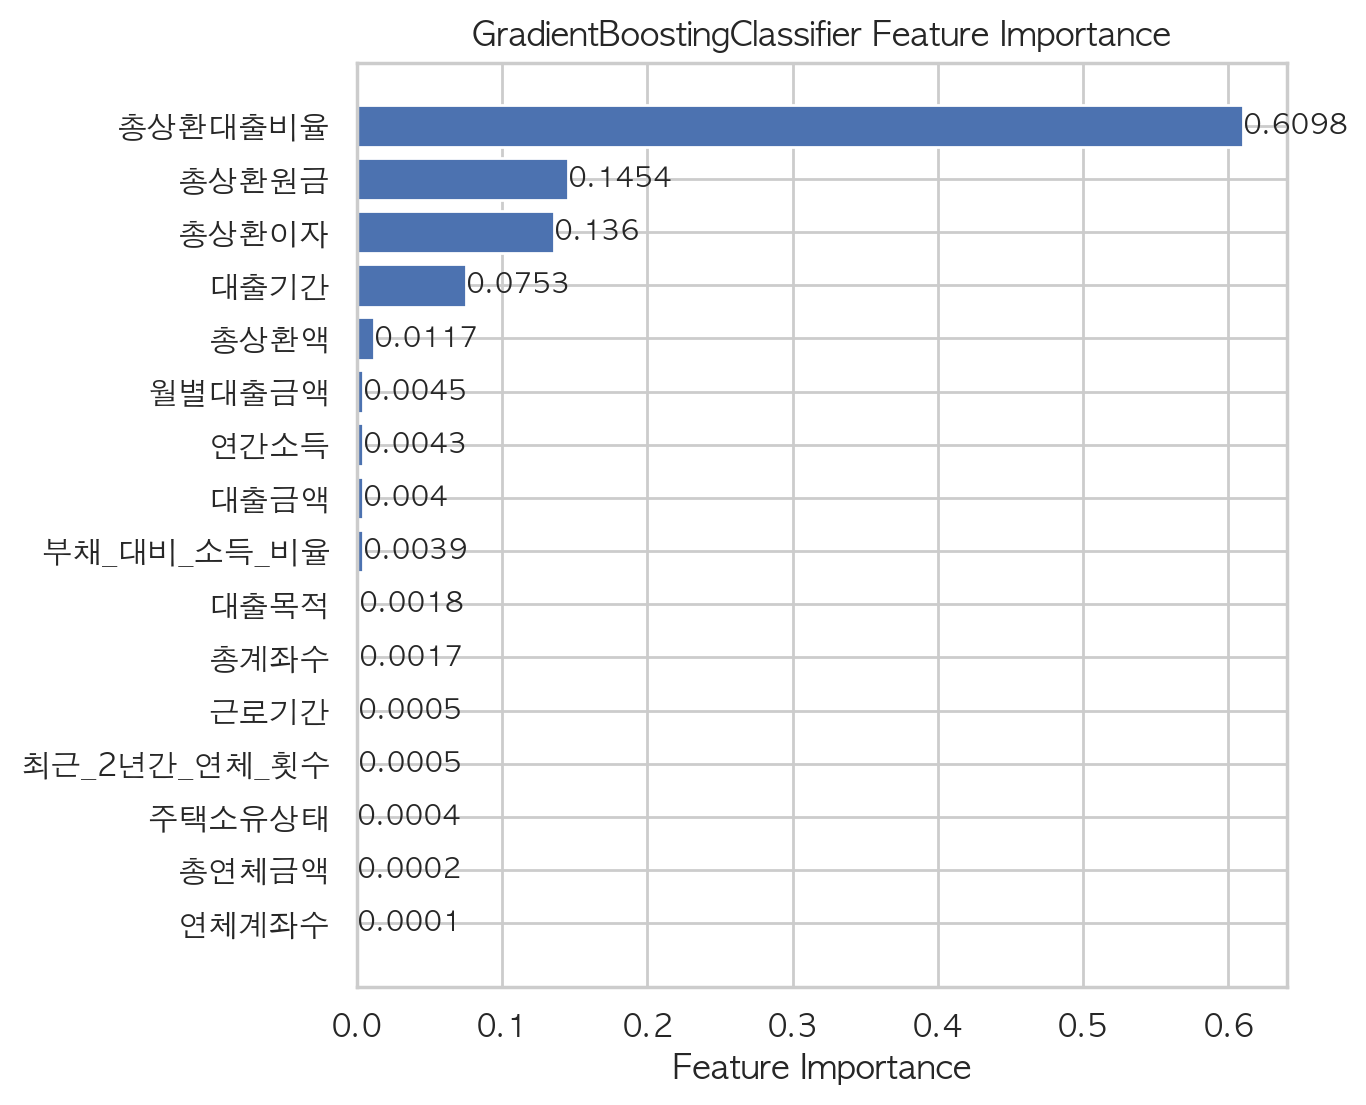

In [92]:
# 피처 중요도 얻기
feature_importances = gb_model.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기 (예시)
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(6, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

# 수치 표시
for bar, val in zip(bars, feature_importance_df['Importance']):
    plt.text(val, bar.get_y() + bar.get_height()/2, round(val, 4), va='center', ha='left', fontsize=10)

plt.xlabel('Feature Importance')
plt.title('GradientBoostingClassifier Feature Importance')
plt.show()

In [308]:
def feature_combination_modeling(X_train, X_test, y_train, y_test, features, clf, n_estimators=100, max_depth=5, learning_rate=0.1):

    i = 0

    feature_list = features
    
    results = {'used_feature': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

    all_combinations = []

    # Generate all combinations of features
    for r in range(1, len(features) + 1):
        feature_combinations = combinations(features, r)
        all_combinations.extend(feature_combinations)

    for features in all_combinations:
        features = list(features)
        
        model = clf(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
        model.fit(X_train[features], y_train)

        y_pred_train = model.predict(X_train[features])
        y_pred_test = model.predict(X_test[features])

        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)

        train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
        test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

        results['used_feature'].append(features)
        results['train_accuracy'].append(train_accuracy)
        results['test_accuracy'].append(test_accuracy)
        results['train_f1'].append(train_f1_score)
        results['test_f1'].append(test_f1_score)
        
        i += 1
        print(f'progress: {i}/{len(all_combinations)}', end='\r')

    result_df = pd.DataFrame(results)
    result_df = result_df.sort_values(by='test_accuracy', ascending=False)
    result_df.to_csv(f'result_{clf.__name__}_{n_estimators}_{max_depth}_{learning_rate}_{feature_list}.csv') 
    
    return result_df


In [307]:
# 하나씩 빼는 함수 만들기

def feature_elimination_by_one_modeling(X_train, X_test, y_train, y_test, features, clf, n_estimators=100, max_depth=5, learning_rate=0.1):

    i = 0

    feature_list = features
    
    results = {'used_feature': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

    while len(features) > 0 :
        
        model = clf(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
        model.fit(X_train[features], y_train)

        y_pred_train = model.predict(X_train[features])
        y_pred_test = model.predict(X_test[features])

        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)

        train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
        test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

        results['used_feature'].append(features)
        results['train_accuracy'].append(train_accuracy)
        results['test_accuracy'].append(test_accuracy)
        results['train_f1'].append(train_f1_score)
        results['test_f1'].append(test_f1_score)

        features = features[:-1]

        i += 1
        print(f'progress: {i}/{len(feature_list)}', end='\r')

    result_df = pd.DataFrame(results)
    result_df = result_df.sort_values(by='test_accuracy', ascending=False)
    result_df.to_csv(f'result_{clf.__name__}_{n_estimators}_{max_depth}_{learning_rate}_elim_{feature_list}.csv') 
    
    return result_df

In [282]:
features = ['대출기간', '연간소득']

In [283]:
feature_combination_modeling(X_train, X_test, y_train, y_test, features, XGBClassifier)

used_feature  train_accuracy  test_accuracy  train_f1   test_f1
2  [대출기간, 연간소득]        0.366496       0.358229  0.322906  0.313121
0        [대출기간]        0.349645       0.345601  0.250736  0.247670
1        [연간소득]        0.318974       0.307178  0.247291  0.236032

In [230]:
features = ['대출기간', '연간소득', '총상환원금', '총상환이자', '총상환액', '총상환대출비율', '월별대출금액']

In [231]:
feature_combination_modeling(X_train, X_test, y_train, y_test, features, XGBClassifier) # 1162초

used_feature  train_accuracy  \
110              [대출기간, 총상환원금, 총상환이자, 총상환대출비율, 월별대출금액]        0.863374   
124        [대출기간, 총상환원금, 총상환이자, 총상환액, 총상환대출비율, 월별대출금액]        0.863083   
74                       [대출기간, 총상환원금, 총상환이자, 총상환대출비율]        0.862488   
108                [대출기간, 총상환원금, 총상환이자, 총상환액, 총상환대출비율]        0.863429   
126  [대출기간, 연간소득, 총상환원금, 총상환이자, 총상환액, 총상환대출비율, 월별대출금액]        0.863485   
..                                                 ...             ...   
7                                         [대출기간, 연간소득]        0.366496   
17                                      [연간소득, 월별대출금액]        0.378141   
6                                             [월별대출금액]        0.365846   
0                                               [대출기간]        0.349645   
1                                               [연간소득]        0.318974   

     test_accuracy  train_f1   test_f1  
110       0.850087  0.863461  0.849897  
124       0.849340  0.863164  0.849155  
74        0.848426  0.862560  0.848217  
108       0.848384  0.863531  0.848208  
126       0.848260  0.863531  0.847980  
..             ...       ...       ...  
7         0.358229  0.322906  0.313121  
17        0.354573  0.326090  0.302935  
6         0.352164  0.315585  0.301210  
0         0.345601  0.250736  0.247670  
1         0.307178  0.247291  0.236032  

[127 rows x 5 columns]

In [235]:
# XGBooster feature importance 보자

# XGBooster 
# 재시도 파라미터 설정:  n_estimators=100, max_depth=5, learning_rate=0.1

xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.860895  0.860860
test   0.842361  0.841887

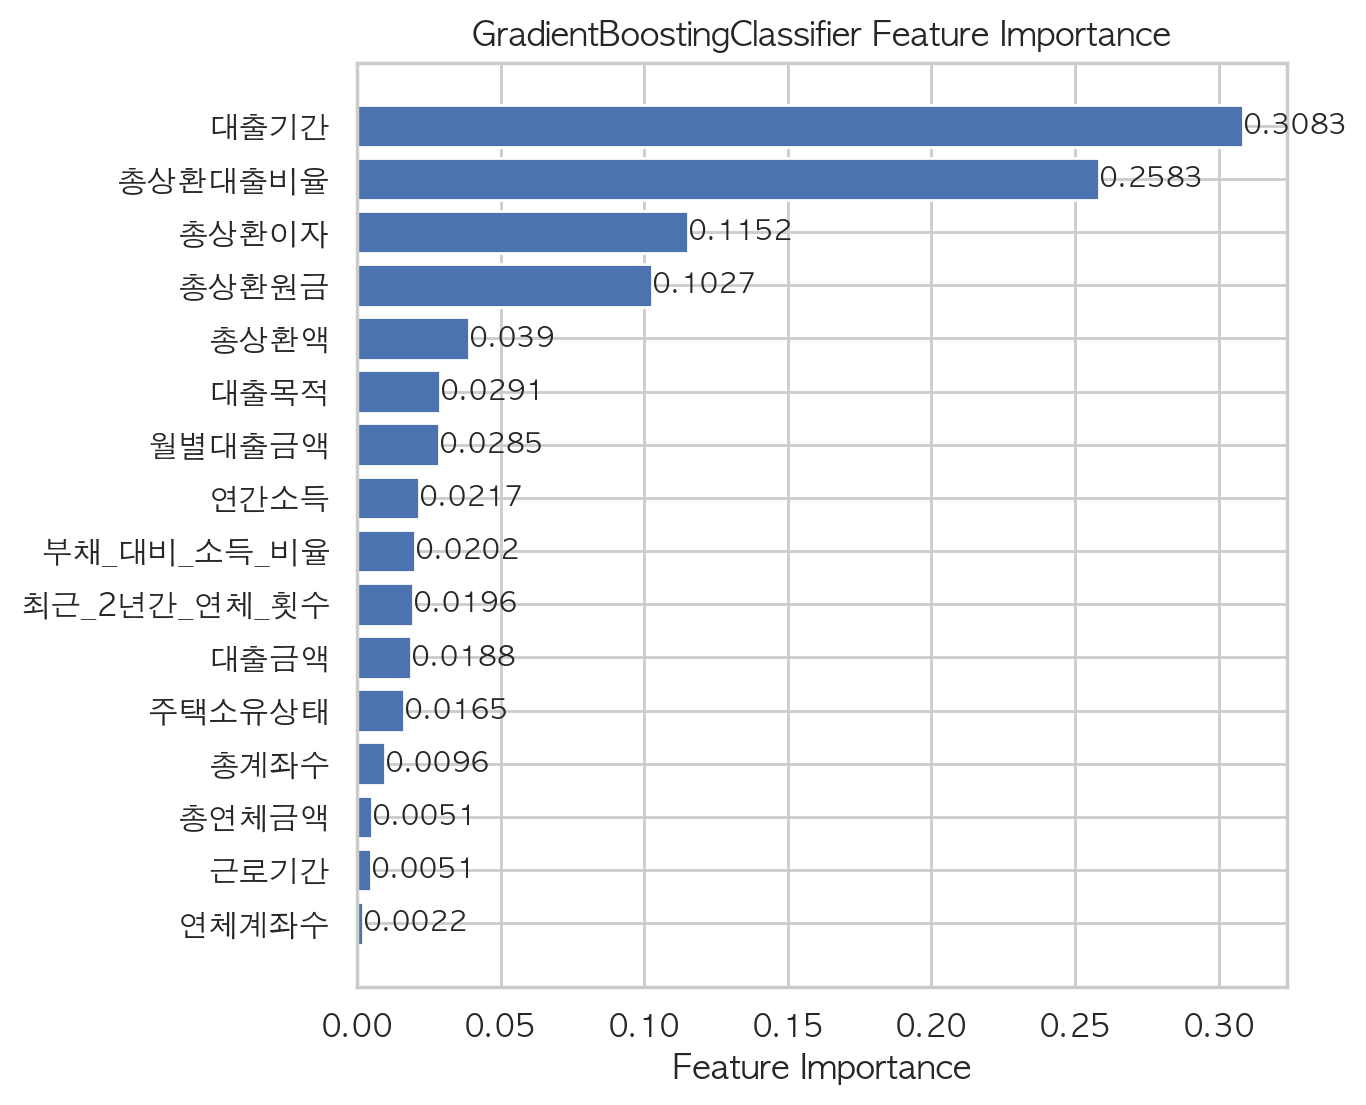

In [236]:
# 피처 중요도 얻기
feature_importances = xgb_model.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기 (예시)
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(6, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

# 수치 표시
for bar, val in zip(bars, feature_importance_df['Importance']):
    plt.text(val, bar.get_y() + bar.get_height()/2, round(val, 4), va='center', ha='left', fontsize=10)

plt.xlabel('Feature Importance')
plt.title('GradientBoostingClassifier Feature Importance')
plt.show()

In [301]:
X_train.columns

Index(['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '총상환액', '총상환대출비율',
       '월별대출금액'],
      dtype='object')

In [244]:
features = ['대출기간', '총상환대출비율', '총상환이자', '총상환원금']

In [245]:
result2 = feature_combination_modeling(X_train, X_test, y_train, y_test, features, XGBClassifier)
result2

used_feature  train_accuracy  test_accuracy  train_f1  \
14  [대출기간, 총상환대출비율, 총상환이자, 총상환원금]        0.862072       0.848260  0.862132   
13        [총상환대출비율, 총상환이자, 총상환원금]        0.857129       0.841489  0.857449   
11         [대출기간, 총상환대출비율, 총상환원금]        0.846605       0.837667  0.846513   
4                 [대출기간, 총상환대출비율]        0.843088       0.836587  0.842693   
12           [대출기간, 총상환이자, 총상환원금]        0.848710       0.834676  0.847995   
10         [대출기간, 총상환대출비율, 총상환이자]        0.842645       0.833846  0.842566   
7                [총상환대출비율, 총상환이자]        0.827358       0.820179  0.827096   
1                       [총상환대출비율]        0.825378       0.817812  0.824167   
8                [총상환대출비율, 총상환원금]        0.817666       0.806264  0.816735   
9                  [총상환이자, 총상환원금]        0.759814       0.745368  0.758798   
6                   [대출기간, 총상환원금]        0.531176       0.514372  0.500729   
3                         [총상환원금]        0.497030       0.486749  0.460194   
5                   [대출기간, 총상환이자]        0.401695       0.387264  0.339825   
2                         [총상환이자]        0.386006       0.374969  0.325836   
0                          [대출기간]        0.349645       0.345601  0.250736   

     test_f1  
14  0.848048  
13  0.841586  
11  0.837422  
4   0.836123  
12  0.833109  
10  0.833471  
7   0.819705  
1   0.816593  
8   0.804982  
9   0.743025  
6   0.481692  
3   0.447951  
5   0.323094  
2   0.311652  
0   0.247670

In [246]:
features = ['총상환대출비율', '대출목적', '대출기간', '연간소득']

In [247]:
result3 = feature_combination_modeling(X_train, X_test, y_train, y_test, features, XGBClassifier)
result3

used_feature  train_accuracy  test_accuracy  train_f1  \
5               [총상환대출비율, 대출기간]        0.843088       0.836587  0.842693   
10        [총상환대출비율, 대출목적, 대출기간]        0.843199       0.835549  0.842822   
12        [총상환대출비율, 대출기간, 연간소득]        0.841482       0.833555  0.841183   
14  [총상환대출비율, 대출목적, 대출기간, 연간소득]        0.843795       0.832973  0.843421   
0                     [총상환대출비율]        0.825378       0.817812  0.824167   
4               [총상환대출비율, 대출목적]        0.819978       0.810875  0.818287   
6               [총상환대출비율, 연간소득]        0.819244       0.810002  0.817826   
11        [총상환대출비율, 대출목적, 연간소득]        0.817416       0.806804  0.815429   
13           [대출목적, 대출기간, 연간소득]        0.382988       0.367284  0.344059   
9                  [대출기간, 연간소득]        0.366496       0.358229  0.322906   
7                  [대출목적, 대출기간]        0.360376       0.355030  0.268993   
2                        [대출기간]        0.349645       0.345601  0.250736   
8                  [대출목적, 연간소득]        0.335618       0.325538  0.270849   
1                        [대출목적]        0.317465       0.323046  0.230307   
3                        [연간소득]        0.318974       0.307178  0.247291   

     test_f1  
5   0.836123  
10  0.834949  
12  0.833009  
14  0.832363  
0   0.816593  
4   0.808732  
6   0.808044  
11  0.804271  
13  0.326024  
9   0.313121  
7   0.265320  
2   0.247670  
8   0.260570  
1   0.235355  
3   0.236032

In [263]:
features = ['총상환대출비율', '총상환원금', '총상환이자']

In [266]:
result4 = feature_combination_modeling(X_train, X_test, y_train, y_test, features, XGBClassifier)
result4

used_feature  train_accuracy  test_accuracy  train_f1   test_f1
6  [총상환대출비율, 총상환원금, 총상환이자]        0.857074       0.842735  0.857371  0.842815
4         [총상환대출비율, 총상환이자]        0.827358       0.820179  0.827096  0.819705
0                [총상환대출비율]        0.825378       0.817812  0.824167  0.816593
3         [총상환대출비율, 총상환원금]        0.817666       0.806264  0.816735  0.804982
5           [총상환원금, 총상환이자]        0.759814       0.745368  0.758798  0.743025
1                  [총상환원금]        0.497030       0.486749  0.460194  0.447951
2                  [총상환이자]        0.386006       0.374969  0.325836  0.311652

In [270]:
features = ['총상환대출비율', '총상환원금', '총상환이자', '대출기간']

In [271]:
result5 = feature_combination_modeling(X_train, X_test, y_train, y_test, features, GradientBoostingClassifier)
result5 # 789초

used_feature  train_accuracy  test_accuracy  train_f1  \
14  [총상환대출비율, 총상환원금, 총상환이자, 대출기간]        0.885030       0.863421  0.885189   
10        [총상환대출비율, 총상환원금, 총상환이자]        0.879408       0.857315  0.879884   
6                 [총상환대출비율, 대출기간]        0.862668       0.848675  0.862981   
11         [총상환대출비율, 총상환원금, 대출기간]        0.865340       0.846183  0.865547   
13           [총상환원금, 총상환이자, 대출기간]        0.865963       0.844480  0.865440   
12         [총상환대출비율, 총상환이자, 대출기간]        0.859968       0.842610  0.860210   
5                [총상환대출비율, 총상환이자]        0.850386       0.833763  0.850759   
0                       [총상환대출비율]        0.847769       0.831935  0.847914   
4                [총상환대출비율, 총상환원금]        0.848392       0.828819  0.848778   
7                  [총상환원금, 총상환이자]        0.805730       0.780801  0.806441   
8                   [총상환원금, 대출기간]        0.588128       0.557074  0.571998   
1                         [총상환원금]        0.555809       0.525920  0.532939   
9                   [총상환이자, 대출기간]        0.476855       0.437069  0.449415   
2                         [총상환이자]        0.466636       0.430963  0.435355   
3                          [대출기간]        0.349645       0.345601  0.250736   

     test_f1  
14  0.863150  
10  0.857455  
6   0.848835  
11  0.846114  
13  0.843024  
12  0.842520  
5   0.833757  
0   0.831859  
4   0.828905  
7   0.780458  
8   0.534803  
1   0.497575  
9   0.401169  
2   0.390896  
3   0.247670

In [274]:
features = ['총상환대출비율', '총상환원금', '총상환이자', '대출기간']

In [275]:
result6 = feature_combination_modeling(X_train, X_test, y_train, y_test, features, GradientBoostingClassifier, n_estimators=100, max_depth=6, learning_rate=0.1)
result6 # 926초

used_feature  train_accuracy  test_accuracy  train_f1  \
14  [총상환대출비율, 총상환원금, 총상환이자, 대출기간]        0.908251       0.877129  0.908474   
10        [총상환대출비율, 총상환원금, 총상환이자]        0.902325       0.871604  0.902875   
6                 [총상환대출비율, 대출기간]        0.882344       0.861012  0.882592   
13           [총상환원금, 총상환이자, 대출기간]        0.888312       0.858561  0.888158   
11         [총상환대출비율, 총상환원금, 대출기간]        0.886733       0.857689  0.886912   
12         [총상환대출비율, 총상환이자, 대출기간]        0.877761       0.852413  0.877958   
0                       [총상환대출비율]        0.867833       0.846224  0.868142   
5                [총상환대출비율, 총상환이자]        0.869286       0.844646  0.869765   
4                [총상환대출비율, 총상환원금]        0.870879       0.841613  0.871341   
7                  [총상환원금, 총상환이자]        0.840693       0.804602  0.840825   
8                   [총상환원금, 대출기간]        0.632313       0.589557  0.620402   
1                         [총상환원금]        0.598513       0.557116  0.580393   
9                   [총상환이자, 대출기간]        0.521719       0.466229  0.501285   
2                         [총상환이자]        0.513854       0.462117  0.489563   
3                          [대출기간]        0.349645       0.345601  0.250736   

     test_f1  
14  0.876967  
10  0.871736  
6   0.861102  
13  0.857633  
11  0.857718  
12  0.852320  
0   0.846274  
5   0.844883  
4   0.841794  
7   0.803525  
8   0.571635  
1   0.533413  
9   0.436546  
2   0.428225  
3   0.247670

In [292]:
features = ['대출기간', '연간소득', '총상환원금', '총상환이자', '총상환액', '총상환대출비율', '월별대출금액']

In [293]:
result7 = feature_combination_modeling(X_train, X_test, y_train, y_test, features, GradientBoostingClassifier)
result7 # GradientBoostingClassifier로는 최대한 한거

used_feature  train_accuracy  \
110              [대출기간, 총상환원금, 총상환이자, 총상환대출비율, 월별대출금액]        0.886844   
74                       [대출기간, 총상환원금, 총상환이자, 총상환대출비율]        0.885764   
124        [대출기간, 총상환원금, 총상환이자, 총상환액, 총상환대출비율, 월별대출금액]        0.887315   
108                [대출기간, 총상환원금, 총상환이자, 총상환액, 총상환대출비율]        0.886249   
126  [대출기간, 연간소득, 총상환원금, 총상환이자, 총상환액, 총상환대출비율, 월별대출금액]        0.886401   
..                                                 ...             ...   
17                                      [연간소득, 월별대출금액]        0.400366   
7                                         [대출기간, 연간소득]        0.379415   
6                                             [월별대출금액]        0.373794   
0                                               [대출기간]        0.349645   
1                                               [연간소득]        0.329622   

     test_accuracy  train_f1   test_f1  
110       0.865623  0.886948  0.865318  
74        0.865000  0.885951  0.864847  
124       0.864584  0.887437  0.864332  
108       0.863961  0.886459  0.863799  
126       0.862757  0.886463  0.862410  
..             ...       ...       ...  
17        0.358852  0.362276  0.314977  
7         0.356235  0.338366  0.310279  
6         0.354283  0.332676  0.310620  
0         0.345601  0.250736  0.247670  
1         0.306181  0.263335  0.236464  

[127 rows x 5 columns]

In [294]:
features = ['총상환대출비율', '총상환원금', '총상환이자', '대출기간']

In [295]:
result8 = feature_combination_modeling(X_train, X_test, y_train, y_test, features, GradientBoostingClassifier, n_estimators=100, max_depth=7, learning_rate=0.1)
result8

used_feature  train_accuracy  test_accuracy  train_f1  \
14  [총상환대출비율, 총상환원금, 총상환이자, 대출기간]        0.928509       0.887597  0.928756   
10        [총상환대출비율, 총상환원금, 총상환이자]        0.921807       0.882861  0.922421   
6                 [총상환대출비율, 대출기간]        0.899874       0.870898  0.900107   
11         [총상환대출비율, 총상환원금, 대출기간]        0.906244       0.867160  0.906422   
13           [총상환원금, 총상환이자, 대출기간]        0.904734       0.865083  0.904742   
12         [총상환대출비율, 총상환이자, 대출기간]        0.897617       0.861344  0.897792   
0                       [총상환대출비율]        0.884283       0.855778  0.884751   
4                [총상환대출비율, 총상환원금]        0.890611       0.851541  0.891175   
5                [총상환대출비율, 총상환이자]        0.887135       0.850544  0.887707   
7                  [총상환원금, 총상환이자]        0.866586       0.820013  0.866872   
8                   [총상환원금, 대출기간]        0.683490       0.627856  0.674825   
1                         [총상환원금]        0.658622       0.605633  0.643968   
9                   [총상환이자, 대출기간]        0.557042       0.486458  0.539936   
2                         [총상환이자]        0.527894       0.464568  0.514527   
3                          [대출기간]        0.349645       0.345601  0.250736   

     test_f1  
14  0.887350  
10  0.882962  
6   0.870891  
11  0.867122  
13  0.864387  
12  0.861224  
0   0.855873  
4   0.851754  
5   0.850756  
7   0.819156  
8   0.612202  
1   0.583763  
9   0.459339  
2   0.444526  
3   0.247670

In [296]:
result9 = feature_combination_modeling(X_train, X_test, y_train, y_test, features, GradientBoostingClassifier, n_estimators=100, max_depth=8, learning_rate=0.1)
result9

used_feature  train_accuracy  test_accuracy  train_f1  \
14  [총상환대출비율, 총상환원금, 총상환이자, 대출기간]        0.944225       0.896943  0.944503   
10        [총상환대출비율, 총상환원금, 총상환이자]        0.937219       0.888178  0.937887   
6                 [총상환대출비율, 대출기간]        0.916864       0.881615  0.917108   
11         [총상환대출비율, 총상환원금, 대출기간]        0.924397       0.874678  0.924635   
13           [총상환원금, 총상환이자, 대출기간]        0.920063       0.868904  0.920173   
12         [총상환대출비율, 총상환이자, 대출기간]        0.915258       0.868489  0.915505   
0                       [총상환대출비율]        0.901729       0.867492  0.902244   
4                [총상환대출비율, 총상환원금]        0.910204       0.859060  0.910854   
5                [총상환대출비율, 총상환이자]        0.904319       0.857606  0.904882   
7                  [총상환원금, 총상환이자]        0.887509       0.829152  0.887980   
8                   [총상환원금, 대출기간]        0.727828       0.660547  0.721699   
1                         [총상환원금]        0.701519       0.636579  0.691749   
2                         [총상환이자]        0.594968       0.512462  0.579558   
9                   [총상환이자, 대출기간]        0.598859       0.510842  0.586471   
3                          [대출기간]        0.349645       0.345601  0.250736   

     test_f1  
14  0.896704  
10  0.888218  
6   0.881569  
11  0.874458  
13  0.868185  
12  0.868324  
0   0.867656  
4   0.859288  
5   0.857784  
7   0.828287  
8   0.646855  
1   0.619640  
2   0.486924  
9   0.488898  
3   0.247670

In [297]:
result10 = feature_combination_modeling(X_train, X_test, y_train, y_test, features, GradientBoostingClassifier, n_estimators=100, max_depth=9, learning_rate=0.1)
result10 

used_feature  train_accuracy  test_accuracy  train_f1  \
14  [총상환대출비율, 총상환원금, 총상환이자, 대출기간]        0.956812       0.901470  0.957057   
10        [총상환대출비율, 총상환원금, 총상환이자]        0.951689       0.893287  0.952369   
6                 [총상환대출비율, 대출기간]        0.931195       0.889050  0.931450   
11         [총상환대출비율, 총상환원금, 대출기간]        0.940265       0.879704  0.940488   
12         [총상환대출비율, 총상환이자, 대출기간]        0.932497       0.877253  0.932767   
0                       [총상환대출비율]        0.914441       0.874346  0.914985   
13           [총상환원금, 총상환이자, 대출기간]        0.932968       0.870981  0.933149   
4                [총상환대출비율, 총상환원금]        0.926183       0.868447  0.926775   
5                [총상환대출비율, 총상환이자]        0.923275       0.866661  0.923905   
7                  [총상환원금, 총상환이자]        0.908750       0.835009  0.909305   
8                   [총상환원금, 대출기간]        0.769548       0.688585  0.764930   
1                         [총상환원금]        0.741605       0.662125  0.734502   
9                   [총상환이자, 대출기간]        0.641715       0.533065  0.633305   
2                         [총상환이자]        0.631565       0.528579  0.618169   
3                          [대출기간]        0.349645       0.345601  0.250736   

     test_f1  
14  0.901246  
10  0.893362  
6   0.888942  
11  0.879511  
12  0.877001  
0   0.874514  
13  0.870371  
4   0.868475  
5   0.866813  
7   0.834333  
8   0.677005  
1   0.648044  
9   0.514621  
2   0.505150  
3   0.247670

In [299]:
features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

In [300]:
result12 = feature_combination_modeling(X_train, X_test, y_train, y_test, features, GradientBoostingClassifier, n_estimators=100, max_depth=10, learning_rate=0.1)
result12

used_feature  train_accuracy  test_accuracy  \
30  [대출기간, 총상환원금, 총상환이자, 총상환대출비율, 월별대출금액]        0.969689       0.905749   
25          [대출기간, 총상환원금, 총상환이자, 총상환대출비율]        0.962738       0.903464   
27         [대출기간, 총상환원금, 총상환대출비율, 월별대출금액]        0.966629       0.901761   
29        [총상환원금, 총상환이자, 총상환대출비율, 월별대출금액]        0.967723       0.900764   
21                [총상환원금, 총상환이자, 총상환대출비율]        0.958363       0.895406   
7                         [대출기간, 총상환대출비율]        0.939656       0.894035   
23               [총상환원금, 총상환대출비율, 월별대출금액]        0.961811       0.890463   
26           [대출기간, 총상환원금, 총상환이자, 월별대출금액]        0.964718       0.889217   
28         [대출기간, 총상환이자, 총상환대출비율, 월별대출금액]        0.963680       0.884938   
16                 [대출기간, 총상환원금, 총상환대출비율]        0.949764       0.884273   
20                [대출기간, 총상환대출비율, 월별대출금액]        0.951730       0.883775   
18                 [대출기간, 총상환이자, 총상환대출비율]        0.943727       0.882446   
24               [총상환이자, 총상환대출비율, 월별대출금액]        0.959997       0.881947   
3                               [총상환대출비율]        0.927097       0.881283   
10                       [총상환원금, 총상환대출비율]        0.940210       0.873100   
17                  [대출기간, 총상환원금, 월별대출금액]        0.959318       0.872767   
15                   [대출기간, 총상환원금, 총상환이자]        0.946150       0.872269   
14                      [총상환대출비율, 월별대출금액]        0.944045       0.871147   
12                       [총상환이자, 총상환대출비율]        0.935973       0.870317   
22                 [총상환원금, 총상환이자, 월별대출금액]        0.954666       0.866412   
9                          [총상환원금, 총상환이자]        0.924632       0.840118   
11                        [총상환원금, 월별대출금액]        0.938867       0.836836   
5                           [대출기간, 총상환원금]        0.805716       0.708108   
1                                 [총상환원금]        0.782315       0.689084   
19                  [대출기간, 총상환이자, 월별대출금액]        0.839987       0.676788   
13                        [총상환이자, 월별대출금액]        0.824852       0.652156   
6                           [대출기간, 총상환이자]        0.687755       0.556077   
2                                 [총상환이자]        0.666847       0.545236   
8                          [대출기간, 월별대출금액]        0.415154       0.377752   
4                                [월별대출금액]        0.392154       0.360721   
0                                  [대출기간]        0.349645       0.345601   

    train_f1   test_f1  
30  0.969776  0.905455  
25  0.962939  0.903215  
27  0.966729  0.901599  
29  0.967826  0.900423  
21  0.959005  0.895373  
7   0.939932  0.893957  
23  0.961917  0.890169  
26  0.964814  0.888810  
28  0.963801  0.884586  
16  0.949994  0.884105  
20  0.951866  0.883632  
18  0.944023  0.882201  
24  0.960149  0.881626  
3   0.927683  0.881378  
10  0.940849  0.873034  
17  0.959360  0.870923  
15  0.946361  0.871689  
14  0.944153  0.870851  
12  0.936609  0.870395  
22  0.954799  0.865593  
9   0.925177  0.839537  
11  0.938834  0.833569  
5   0.802901  0.698533  
1   0.778346  0.678544  
19  0.839868  0.671577  
13  0.824360  0.644579  
6   0.680723  0.538672  
2   0.657975  0.525691  
8   0.389892  0.347361  
4   0.367921  0.331930  
0   0.250736  0.247670

In [ ]:
# 총 11개의 features로는 한 번 해볼만 함 그 이상의 feature수는 너무 오래걸림

In [304]:
features = ['대출기간', '총상환대출비율', '총상환이자', '총상환원금', '총상환액', '대출목적', '월별대출금액', '연간소득' , '부채_대비_소득_비율', '최근_2년간_연체_횟수', '대출금액']

In [305]:
result13 = feature_combination_modeling(X_train, X_test, y_train, y_test, features, XGBClassifier)
result13 # 7970초? 놉

used_feature  train_accuracy  \
563               [대출기간, 총상환대출비율, 총상환이자, 총상환원금, 월별대출금액]        0.863374   
1036  [대출기간, 총상환대출비율, 총상환이자, 총상환원금, 월별대출금액, 최근_2년간_연...        0.863900   
567                 [대출기간, 총상환대출비율, 총상환이자, 총상환원금, 대출금액]        0.863651   
1830  [대출기간, 총상환대출비율, 총상환이자, 총상환원금, 총상환액, 월별대출금액, 최근...        0.863803   
1492  [대출기간, 총상환대출비율, 총상환이자, 총상환원금, 총상환액, 월별대출금액, 최근...        0.863000   
...                                                 ...             ...   
8                                         [부채_대비_소득_비율]        0.329332   
63                          [부채_대비_소득_비율, 최근_2년간_연체_횟수]        0.331561   
61                                 [연간소득, 최근_2년간_연체_횟수]        0.321494   
7                                                [연간소득]        0.318974   
9                                        [최근_2년간_연체_횟수]        0.300018   

      test_accuracy  train_f1   test_f1  
563        0.850087  0.863461  0.849897  
1036       0.850004  0.863992  0.849804  
567        0.849630  0.863709  0.849415  
1830       0.849423  0.863900  0.849217  
1492       0.849423  0.863080  0.849198  
...             ...       ...       ...  
8          0.317770  0.241485  0.230372  
63         0.314530  0.244589  0.228684  
61         0.307344  0.252683  0.238862  
7          0.307178  0.247291  0.236032  
9          0.299286  0.203047  0.202026  

[2047 rows x 5 columns]

In [309]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']
max_depth=6

results = {'num_max_depth': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

while max_depth <= 20 :
    
    xgb_model = XGBClassifier(n_estimators=100, max_depth=max_depth, learning_rate=0.1, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['num_max_depth'].append(max_depth)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    max_depth += 1
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_changing_parameter.csv') 


In [310]:
result_df

num_max_depth  train_accuracy  test_accuracy  train_f1   test_f1
0               6        0.886290       0.868115  0.886388  0.867966
1               7        0.905870       0.879580  0.906000  0.879405
2               8        0.924964       0.890130  0.925088  0.889899
3               9        0.938797       0.897400  0.938921  0.897188
4              10        0.950761       0.903215  0.950883  0.902997
5              11        0.958390       0.906746  0.958512  0.906510
6              12        0.963985       0.908657  0.964094  0.908442
7              13        0.966477       0.910277  0.966572  0.910067
8              14        0.968291       0.911357  0.968375  0.911144
9              15        0.969149       0.910484  0.969211  0.910294
10             16        0.969676       0.911938  0.969734  0.911738
11             17        0.970036       0.913392  0.970091  0.913192
12             18        0.970271       0.913434  0.970324  0.913239
13             19        0.970534       0.913600  0.970586  0.913405
14             20        0.970728       0.913766  0.970778  0.913581

In [311]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']
max_depth=21

results = {'num_max_depth': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

while max_depth <= 23 :
    
    xgb_model = XGBClassifier(n_estimators=100, max_depth=max_depth, learning_rate=0.1, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['num_max_depth'].append(max_depth)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    max_depth += 1
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_changing_parameter1.csv') 

In [312]:
result_df

num_max_depth  train_accuracy  test_accuracy  train_f1   test_f1
0             21        0.970894       0.913060  0.970945  0.912869
1             22        0.971088       0.913475  0.971139  0.913293
2             23        0.971226       0.913309  0.971278  0.913140

In [313]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

learning_rate_list= [0.1, 0.05, 0.01]

results = {'learning_rate': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

for learning_rate in learning_rate_list:
    
    xgb_model = XGBClassifier(n_estimators=200, max_depth=20, learning_rate=learning_rate, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['learning_rate'].append(learning_rate)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_changing_LR.csv') 

In [314]:
result_df

learning_rate  train_accuracy  test_accuracy  train_f1   test_f1
0           0.10        0.971503       0.916424  0.971557  0.916236
1           0.05        0.970756       0.913807  0.970808  0.913627
2           0.01        0.955372       0.901720  0.955408  0.901532

In [315]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

learning_rate_list= [0.1, 0.05, 0.01]

results = {'learning_rate': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

for learning_rate in learning_rate_list:
    
    xgb_model = XGBClassifier(n_estimators=300, max_depth=20, learning_rate=learning_rate, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['learning_rate'].append(learning_rate)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_changing_LR2.csv') 

In [316]:
result_df

learning_rate  train_accuracy  test_accuracy  train_f1   test_f1
0           0.10        0.971905       0.916923  0.971958  0.916738
1           0.05        0.971143       0.915344  0.971197  0.915155
2           0.01        0.962904       0.905001  0.962949  0.904806

In [317]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

learning_rate_list= [0.1, 0.05, 0.01]

results = {'learning_rate': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

for learning_rate in learning_rate_list:
    
    xgb_model = XGBClassifier(n_estimators=400, max_depth=20, learning_rate=learning_rate, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['learning_rate'].append(learning_rate)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_em400_changing_LR3.csv') 

In [318]:
result_df

learning_rate  train_accuracy  test_accuracy  train_f1   test_f1
0           0.10        0.972071       0.917504  0.972123  0.917312
1           0.05        0.971462       0.916009  0.971516  0.915833
2           0.01        0.966920       0.907410  0.966967  0.907227

In [319]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

learning_rate_list= [0.1, 0.05, 0.02, 0.01]

results = {'learning_rate': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

for learning_rate in learning_rate_list:
    
    xgb_model = XGBClassifier(n_estimators=500, max_depth=20, learning_rate=learning_rate, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['learning_rate'].append(learning_rate)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_em500_changing_LR4.csv') 

In [320]:
result_df

learning_rate  train_accuracy  test_accuracy  train_f1   test_f1
0           0.10        0.972293       0.917920  0.972345  0.917725
1           0.05        0.971753       0.916507  0.971808  0.916324
2           0.02        0.970742       0.913267  0.970792  0.913088
3           0.01        0.968831       0.909570  0.968880  0.909387

In [321]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

learning_rate_list= [0.1, 0.05, 0.02, 0.01]

results = {'learning_rate': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

for learning_rate in learning_rate_list:
    
    xgb_model = XGBClassifier(n_estimators=600, max_depth=20, learning_rate=learning_rate, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['learning_rate'].append(learning_rate)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_em600_changing_LR5.csv') 

In [322]:
result_df

learning_rate  train_accuracy  test_accuracy  train_f1   test_f1
0           0.10        0.972390       0.918252  0.972443  0.918069
1           0.05        0.971933       0.917380  0.971986  0.917203
2           0.02        0.970908       0.913891  0.970960  0.913703
3           0.01        0.969869       0.910484  0.969918  0.910286

In [323]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

learning_rate_list= [0.1, 0.05, 0.02, 0.01]

results = {'learning_rate': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

for learning_rate in learning_rate_list:
    
    xgb_model = XGBClassifier(n_estimators=700, max_depth=20, learning_rate=learning_rate, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['learning_rate'].append(learning_rate)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_em700_changing_LR6.csv') 

In [324]:
result_df

learning_rate  train_accuracy  test_accuracy  train_f1   test_f1
0           0.10        0.972417       0.918584  0.972470  0.918401
1           0.05        0.972002       0.917546  0.972055  0.917362
2           0.02        0.971088       0.914804  0.971140  0.914613
3           0.01        0.970423       0.911772  0.970473  0.911584

In [325]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

learning_rate_list= [0.1, 0.05, 0.02, 0.01]

results = {'learning_rate': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

for learning_rate in learning_rate_list:
    
    xgb_model = XGBClassifier(n_estimators=800, max_depth=20, learning_rate=learning_rate, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['learning_rate'].append(learning_rate)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_em800_changing_LR7.csv') 

In [327]:
result_df

learning_rate  train_accuracy  test_accuracy  train_f1   test_f1
0           0.10        0.972473       0.919000  0.972525  0.918817
1           0.05        0.972071       0.917712  0.972125  0.917529
2           0.02        0.971226       0.915594  0.971279  0.915407
3           0.01        0.970576       0.912437  0.970625  0.912252

In [328]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

n_estimators_list= [100, 200, 300, 400, 500, 600, 700, 800]

results = {'n_estimators': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

for n_estimators in n_estimators_list:
    
    xgb_model = XGBClassifier(n_estimators=n_estimators, max_depth=20, learning_rate=0.5, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['n_estimators'].append(n_estimators)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_LR05_changing_em.csv') 

In [329]:
result_df

n_estimators  train_accuracy  test_accuracy  train_f1   test_f1
0           100        0.972362       0.917587  0.972414  0.917405
1           200        0.972514       0.919332  0.972567  0.919170
2           300        0.972514       0.919914  0.972565  0.919744
3           400        0.972514       0.920329  0.972568  0.920171
4           500        0.972514       0.920287  0.972568  0.920126
5           600        0.972514       0.920744  0.972565  0.920581
6           700        0.972514       0.920620  0.972566  0.920455
7           800        0.972514       0.920661  0.972568  0.920498

In [330]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

learning_rate_list= [0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1]

results = {'learning_rate': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

for learning_rate in learning_rate_list:
    
    xgb_model = XGBClassifier(n_estimators=600, max_depth=20, learning_rate=learning_rate, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['learning_rate'].append(learning_rate)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_em600_changing_LR_readj.csv') 

In [331]:
result_df

learning_rate  train_accuracy  test_accuracy  train_f1   test_f1
0            0.2        0.972514       0.919831  0.972567  0.919662
1            0.3        0.972514       0.919872  0.972565  0.919692
2            0.4        0.972514       0.920204  0.972568  0.920035
3            0.6        0.972514       0.919872  0.972567  0.919685
4            0.7        0.972514       0.920204  0.972565  0.920030
5            0.8        0.972514       0.920204  0.972567  0.920045
6            0.9        0.972514       0.919415  0.972567  0.919221
7            1.0        0.972514       0.918127  0.972567  0.917927

In [332]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

min_child_weight_list= [2, 3, 4]

results = {'min_child_weight': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

for min_child_weight in min_child_weight_list:
    
    xgb_model = XGBClassifier(min_child_weight=min_child_weight, n_estimators=600, max_depth=20, learning_rate=0.5, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['min_child_weight'].append(min_child_weight)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_changing_child_weight.csv') 

In [333]:
result_df

min_child_weight  train_accuracy  test_accuracy  train_f1   test_f1
0                 2        0.972514       0.920204  0.972568  0.920034
1                 3        0.972514       0.919083  0.972569  0.918891
2                 4        0.972486       0.920620  0.972542  0.920453

In [334]:
from sklearn.model_selection import StratifiedKFold

In [337]:
features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

results = {'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in stratified_kfold.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # XGBoost 모델 생성
    xgb_model = XGBClassifier(n_estimators=600,
                              max_depth=20, learning_rate=0.5,
                              random_state=42, n_jobs=-1)
    
    # 모델 훈련
    xgb_model.fit(X_train[features], y_train)
    
    # 예측
    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])
    
    # 성능 평가 및 결과 저장
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_final_kfold.csv') 

In [338]:
result_df

train_accuracy  test_accuracy  train_f1   test_f1
0        0.972597       0.915832  0.972655  0.915638
1        0.972103       0.923620  0.972158  0.923432
2        0.972142       0.920712  0.972190  0.920576
3        0.972441       0.922058  0.972484  0.921919
4        0.971896       0.921487  0.971949  0.921311

In [339]:
from sklearn.model_selection import cross_val_score

In [340]:
features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

# XGBoost 모델 생성
xgb_model = XGBClassifier(n_estimators=600,
                          max_depth=20, learning_rate=0.5,
                          random_state=42, n_jobs=-1)

# cross_val_score를 사용하여 5-fold 교차 검증 수행
cv_results = cross_val_score(xgb_model, X[features], y, cv=5, scoring='accuracy')

# 교차 검증 결과 출력
print("Cross-validated Accuracy:", cv_results)
print("Mean Accuracy:", cv_results.mean())


Cross-validated Accuracy: [0.92060855 0.92112778 0.92242588 0.92018901 0.9240835 ]
Mean Accuracy: 0.921686944000313
